### practice

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("shoe_sales.csv")

In [4]:
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [5]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      60 non-null     object 
 1   brand     60 non-null     object 
 2   sold_qty  58 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


# Nike Analysis

In [12]:
df_nike = df[df["brand"]=="Nike"]

In [13]:
df_nike.head(4)

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0


In [15]:
df_nike['sold_qty'].median()

np.float64(19.5)

In [18]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [21]:
median_val = round(df_nike['sold_qty'].median())
median_val

20

In [24]:
df_nike.fillna({"sold_qty":median_val},inplace=True)

C:\Users\scl\AppData\Local\Temp\ipykernel_19100\3096320600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.fillna({"sold_qty":median_val},inplace=True)


In [25]:
df_nike

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0
10,9/6/2023,Nike,23.0
12,9/7/2023,Nike,19.0
14,9/8/2023,Nike,17.0
16,9/9/2023,Nike,25.0
18,9/10/2023,Nike,14.0


In [27]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


# Adidas Analysis

In [28]:
df_adidas = df[df['brand']=="Adidas"]

In [29]:
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [30]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [31]:
df_adidas.sold_qty.quantile([0.9])

0.9    17.1
Name: sold_qty, dtype: float64

In [32]:
df_adidas[df.sold_qty > 17.1]

C:\Users\scl\AppData\Local\Temp\ipykernel_19100\3209490196.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_adidas[df.sold_qty > 17.1]


,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0
41,9/21/2023,Adidas,18.0


<style>
/* Increase font size for code cells */
.CodeMirror pre {
    font-size: 20px;
}
</style>


<style>
/* Increase font size for code cells */
.CodeMirror pre {
    font-size: 16px;
}
</style>


In [54]:
def plot_qty():
    plt.figure(figsize=(15,6))
    dates = df_nike['date']

    plt.plot(dates,df_nike['sold_qty'],marker='o', label="Nike",color="blue")
    plt.plot(dates,df_adidas['sold_qty'],marker='o', color = "red", label="Adidas")
    plt.xlabel("Date")
    plt.ylabel("Total Quantity Sold")
    plt.title("Analysis of Nike and Adidas Shoes sold in  September 2023")
    plt.xticks(rotation = 45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True,linestyle="--", linewidth = 0.5)
    plt.show()

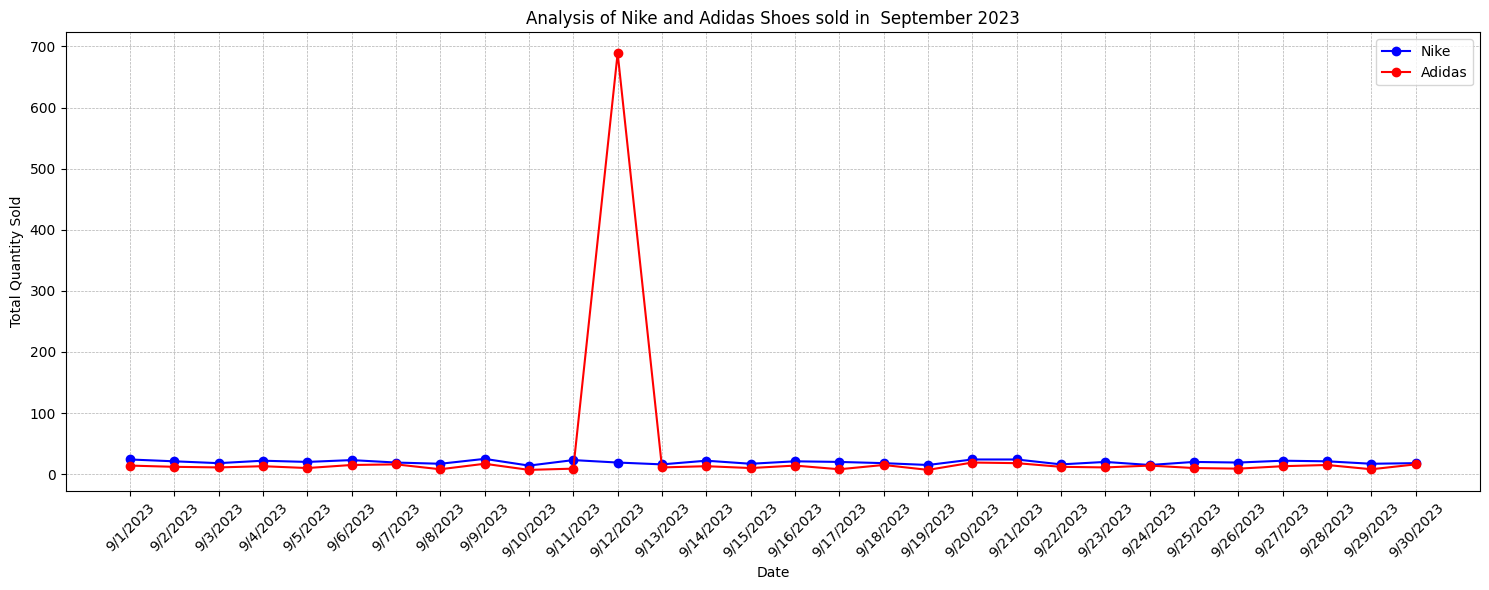

In [55]:
plot_qty()

In [56]:
val = round(df_adidas['sold_qty'].median())

In [57]:
val

12

In [58]:
df_adidas['sold_qty'].replace(689,val,inplace=True)

C:\Users\scl\AppData\Local\Temp\ipykernel_19100\2487770428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas['sold_qty'].replace(689,val,inplace=True)
C:\Users\scl\AppData\Local\Temp\ipykernel_19100\2487770428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas['sold_qty'].replace(689,val,inplace=True)


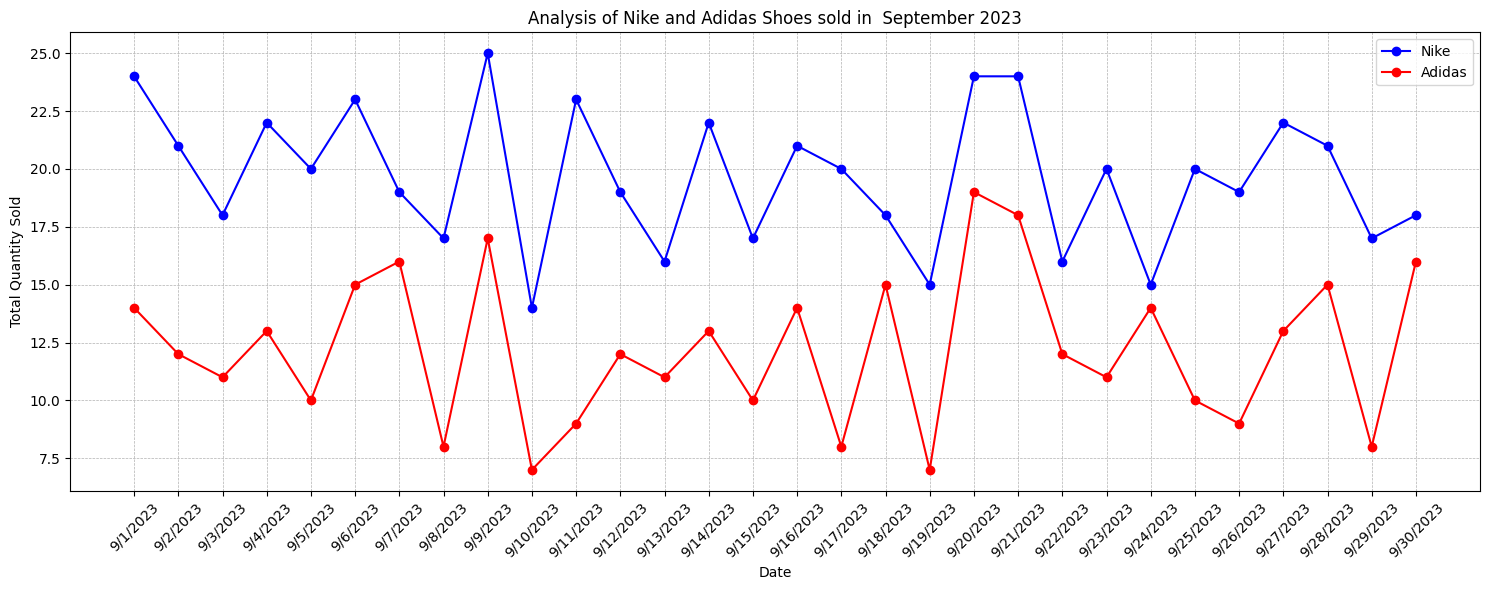

In [59]:
plot_qty()